<a href="https://colab.research.google.com/github/suryawanshiaarti022/Individual-Project/blob/main/full_logic_model_without_custom_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [2]:
# loading the Zoo dataset into a pandas DataFrame called zoo_data
column_names = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
                'predator', 'toothed','backbone', 'breathes', 'venomous', 'fins', 'legs',
                'tail', 'domestic', 'catsize', 'class_type']
zoo_data = pd.read_csv('zoo.csv',names=column_names)

## Data Preprocessing

##### removing the first row of the dataset

In [3]:
# Displaying the first few rows of the dataframe
zoo_data = zoo_data.iloc[1:,:]
print(zoo_data.head())

  animal_name hair feathers eggs milk airborne aquatic predator toothed  \
1    aardvark    1        0    0    1        0       0        1       1   
2    antelope    1        0    0    1        0       0        0       1   
3        bass    0        0    1    0        0       1        1       1   
4        bear    1        0    0    1        0       0        1       1   
5        boar    1        0    0    1        0       0        1       1   

  backbone breathes venomous fins legs tail domestic catsize class_type  
1        1        1        0    0    4    0        0       1          1  
2        1        1        0    0    4    1        0       1          1  
3        1        0        0    1    0    1        0       0          4  
4        1        1        0    0    4    0        0       1          1  
5        1        1        0    0    4    1        0       1          1  


##### Converting the 'legs' column to numeric values because it's essential for mathematical operations later

In [4]:
zoo_data["legs"] = pd.to_numeric(zoo_data["legs"])

In [5]:
# Binarizing the 'legs' feature: 1 if legs > 0, else 0
zoo_data['binary_legs'] = (zoo_data['legs'] > 0).astype(int)
print(zoo_data.head())

  animal_name hair feathers eggs milk airborne aquatic predator toothed  \
1    aardvark    1        0    0    1        0       0        1       1   
2    antelope    1        0    0    1        0       0        0       1   
3        bass    0        0    1    0        0       1        1       1   
4        bear    1        0    0    1        0       0        1       1   
5        boar    1        0    0    1        0       0        1       1   

  backbone breathes venomous fins  legs tail domestic catsize class_type  \
1        1        1        0    0     4    0        0       1          1   
2        1        1        0    0     4    1        0       1          1   
3        1        0        0    1     0    1        0       0          4   
4        1        1        0    0     4    0        0       1          1   
5        1        1        0    0     4    1        0       1          1   

   binary_legs  
1            1  
2            1  
3            0  
4            1  
5      

In [6]:
# Converting the target to a binary classification for each class
for i in range(1, 8):
    zoo_data[f'class_{i}'] = (zoo_data['class_type'].astype(int) == i).astype(int)

print(zoo_data.head())

  animal_name hair feathers eggs milk airborne aquatic predator toothed  \
1    aardvark    1        0    0    1        0       0        1       1   
2    antelope    1        0    0    1        0       0        0       1   
3        bass    0        0    1    0        0       1        1       1   
4        bear    1        0    0    1        0       0        1       1   
5        boar    1        0    0    1        0       0        1       1   

  backbone  ... catsize class_type binary_legs  class_1 class_2 class_3  \
1        1  ...       1          1           1        1       0       0   
2        1  ...       1          1           1        1       0       0   
3        1  ...       0          4           0        0       0       0   
4        1  ...       1          1           1        1       0       0   
5        1  ...       1          1           1        1       0       0   

  class_4 class_5  class_6  class_7  
1       0       0        0        0  
2       0       0     

In [7]:
# Dropping the 'animal_name' column as it is not necessary
zoo_data = zoo_data.drop(columns=['animal_name'])

print(zoo_data.head())

  hair feathers eggs milk airborne aquatic predator toothed backbone breathes  \
1    1        0    0    1        0       0        1       1        1        1   
2    1        0    0    1        0       0        0       1        1        1   
3    0        0    1    0        0       1        1       1        1        0   
4    1        0    0    1        0       0        1       1        1        1   
5    1        0    0    1        0       0        1       1        1        1   

   ... catsize class_type  binary_legs class_1 class_2 class_3 class_4  \
1  ...       1          1            1       1       0       0       0   
2  ...       1          1            1       1       0       0       0   
3  ...       0          4            0       0       0       0       1   
4  ...       1          1            1       1       0       0       0   
5  ...       1          1            1       1       0       0       0   

   class_5  class_6  class_7  
1        0        0        0  
2     

In [8]:
X_train = zoo_data.drop([f'class_{i}' for i in range(1, 8)], axis=1)
y_train = zoo_data[[f'class_{i}' for i in range(1, 8)]]

X_test = zoo_data.drop([f'class_{i}' for i in range(1, 8)], axis=1)
y_test = zoo_data[[f'class_{i}' for i in range(1, 8)]]

In [9]:
X_train = X_train.astype(float)
X_test = X_test.astype(int)
y_train = y_train.astype(float)
y_test = y_test.astype(int)

In [10]:
# Converting data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [11]:
# Creating data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=True)

In [12]:
# Defining the MLP architecture with the custom logic gate
class CustomMLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(CustomMLP, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size)
        self.hidden2 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
      out = self.hidden1(x)
      out = self.relu(out)
      out = self.hidden2(out)
      out = self.relu(out)
      out = self.output(out)
      return out

In [27]:
# Initializing the model, loss, and optimizer
model = CustomMLP(input_size=X_train.shape[1], hidden_size=10, num_classes=7)
loss_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [28]:
def train_and_test(model, train_loader, test_loader, loss_criterion, optimizer, num_epochs):
    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        # Training Phase
        model.train()
        total_loss = 0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_train_loss = total_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Testing/Validation Phase
        model.eval()
        total_test_loss = 0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = loss_criterion(outputs, targets)
                total_test_loss += loss.item()
        avg_test_loss = total_test_loss / len(test_loader)
        test_losses.append(avg_test_loss)

    return train_losses, test_losses

In [29]:
# Defining the number of epochs
num_epochs = 20

train_losses, test_losses = train_and_test(model, train_loader, test_loader, loss_criterion, optimizer, num_epochs)


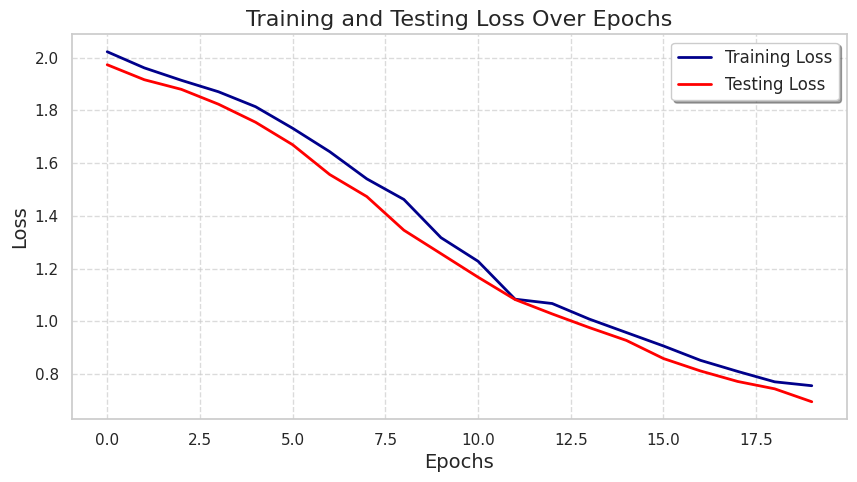

In [30]:
plt.figure(figsize=(10, 5))

# Plotting both training and testing/validation losses
plt.plot(train_losses, label='Training Loss', color='darkblue', linewidth=2)
plt.plot(test_losses, label='Testing Loss', color='red', linewidth=2)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training and Testing Loss Over Epochs', fontsize=16)
plt.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)
plt.show()


In [31]:
# Prediction Function
def predict(model, inputs):
    model.eval()
    with torch.no_grad():
        outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    return predicted

In [32]:
# Predicting on the test set
test_predictions = predict(model, X_test_tensor)
print(test_predictions)
# test_predictions += 1

tensor([0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 1, 3, 3, 6, 6, 1, 0, 3, 0, 1, 1, 0, 1,
        6, 6, 6, 0, 0, 0, 5, 0, 0, 1, 3, 0, 0, 1, 3, 5, 5, 1, 5, 1, 0, 0, 6, 0,
        0, 0, 0, 5, 6, 6, 0, 0, 1, 1, 1, 1, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        6, 3, 0, 0, 3, 3, 1, 1, 3, 3, 3, 1, 0, 6, 3, 1, 6, 6, 1, 1, 3, 0, 0, 1,
        0, 5, 0, 3, 1])


In [33]:
# Converting predictions back to a pandas DataFrame (optional)
import pandas as pd
test_predictions_df = pd.DataFrame(test_predictions.numpy(), columns=['Predicted Class'])
test_predictions_df.head()

,Predicted Class
0,0
1,0
2,3
3,0
4,0


In [34]:
test_predictions.shape

torch.Size([101])

In [35]:
true_labels = y_test_tensor.argmax(axis=1).numpy()  # Convert to numpy array

# Converting test_predictions to numpy array
predicted_labels = test_predictions.numpy()

# Generating the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Converting the confusion matrix to a DataFrame for better readability
confusion_matrix_df = pd.DataFrame(cm,
                                   index=[i for i in range(7)],
                                   columns=[i for i in range(7)])

confusion_matrix_df


,0,1,2,3,4,5,6
0,41,0,0,0,0,0,0
1,0,20,0,0,0,0,0
2,0,2,0,3,0,0,0
3,0,0,0,13,0,0,0
4,0,0,0,0,0,0,4
5,0,0,0,0,0,6,2
6,0,0,0,4,0,0,6


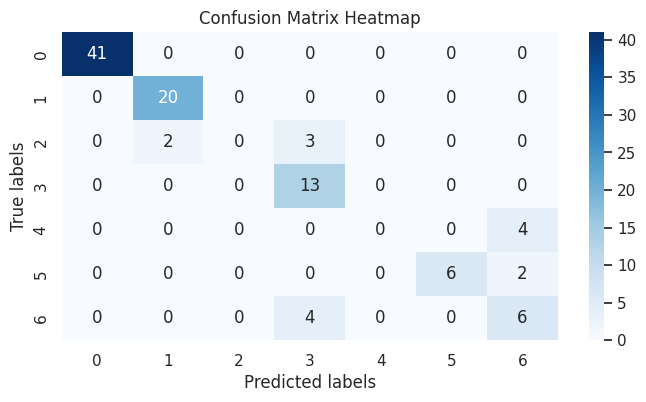

In [36]:
# Generating the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix_df, annot=True, fmt='g', cmap='Blues')

# Adding labels for clarity
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')

# Displaying the heatmap
plt.show()


In [37]:
# tensor for true labels
true_labels = y_test_tensor.argmax(axis=1).numpy()  # Convert to numpy array

# Converting test_predictions to numpy array
predicted_labels = test_predictions.numpy()

# Generating the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Calculating accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Printing accuracy
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.85


## Feature Selection

In [24]:
temp = zoo_data

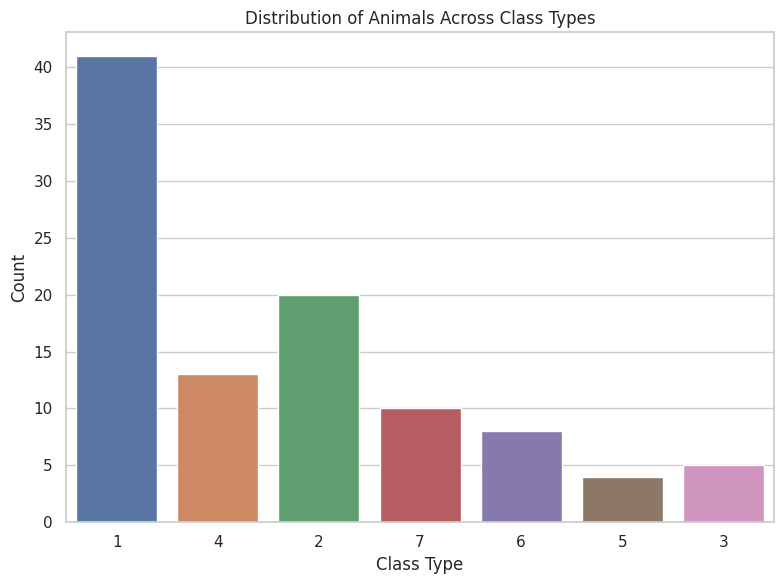

In [25]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating the plot
fig, ax = plt.subplots(1, figsize=(8, 6))

# Distribution of Animals Across Different Class Types
sns.countplot(x='class_type', data=temp, ax=ax)
ax.set_title('Distribution of Animals Across Class Types')
ax.set_xlabel('Class Type')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


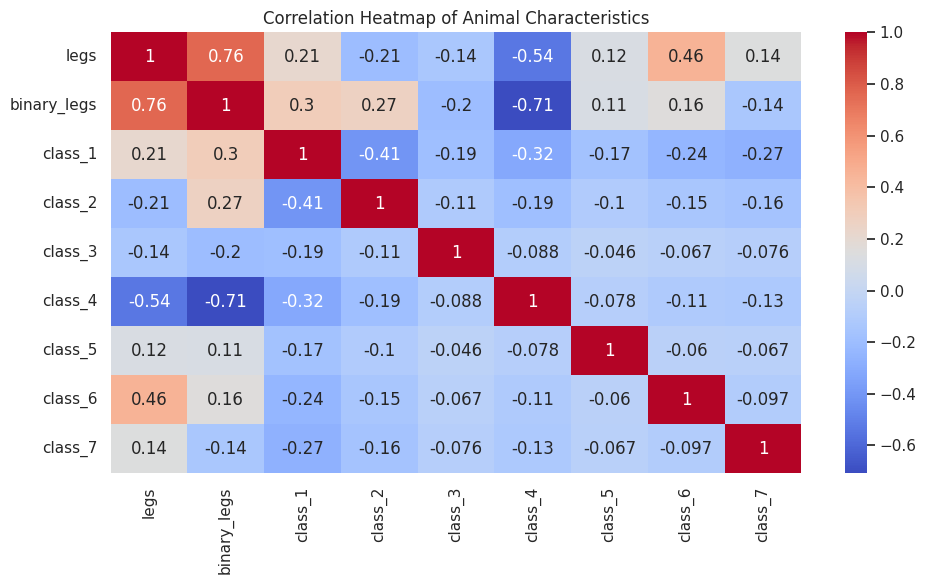

In [38]:
# Correlation Heatmap
# Setting the style of the plots
sns.set(style="whitegrid")

# Creating the plots
fig, ax = plt.subplots(1, figsize=(10, 6))

# Dropping non-numeric columns
corr = temp.drop(['class_type'], axis=1).corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Heatmap of Animal Characteristics')

plt.tight_layout()
plt.show()


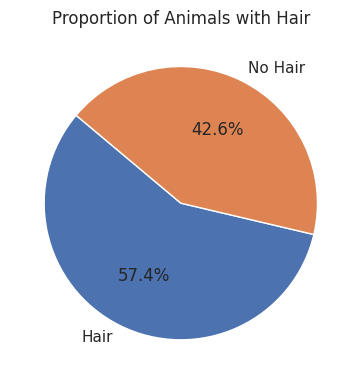

In [39]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating the plot
fig, ax = plt.subplots(1, figsize=(8, 4))

# Proportion of Animals with Hair
hair_data = temp['hair'].value_counts().sort_index()  # Sorting by index to ensure correct order

# Explicitly defining labels based on sorted index
labels = ['No Hair', 'Hair'] if hair_data.index[0] == 0 else ['Hair', 'No Hair']
ax.pie(hair_data, labels=labels, autopct='%1.1f%%', startangle=140)
ax.set_title('Proportion of Animals with Hair')

plt.tight_layout()
plt.show()


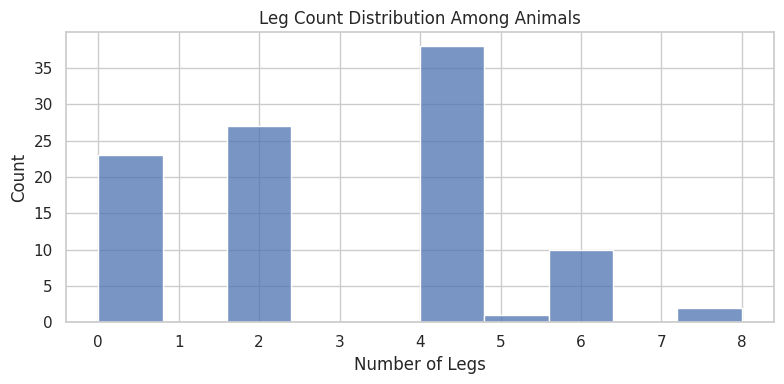

In [40]:
#Leg Count Distribution
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating the plot
fig, ax = plt.subplots(1, figsize=(8, 4))

sns.histplot(temp['legs'], kde=False, ax=ax)  # Use 'ax' directly here
ax.set_title('Leg Count Distribution Among Animals')
ax.set_xlabel('Number of Legs')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


In [41]:
zoo_data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,catsize,class_type,binary_legs,class_1,class_2,class_3,class_4,class_5,class_6,class_7
1,1,0,0,1,0,0,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,1,1,...,1,1,1,1,0,0,0,0,0,0
3,0,0,1,0,0,1,1,1,1,0,...,0,4,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0
5,1,0,0,1,0,0,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0


In [43]:
# Creating an empty DataFrames for the balanced train and test sets
balanced_train_set = pd.DataFrame()
balanced_test_set = pd.DataFrame()

# Calculating the target number of samples per class for both train and test sets
num_classes = zoo_data['class_type'].nunique()
total_samples = len(zoo_data)
samples_per_class_train = total_samples // (2 * num_classes)  # Dividing by 2 for train and test

temp = zoo_data.drop(['class_type', 'legs'],axis=1)

# Iterating through each class type
for class_type in zoo_data['class_type'].unique():
    # Getting samples for the current class
    class_samples = zoo_data[zoo_data['class_type'] == class_type].index.values

    filtered_temp = temp.loc[class_samples]

    # Splitting the data into train and test sets for the current class
    train_data, test_data = train_test_split(filtered_temp, test_size=0.2, random_state=42)

    # Appending the train data to the balanced train set
    balanced_train_set = balanced_train_set.append(train_data, ignore_index=True)

    # Appending the test data to the balanced test set
    balanced_test_set = balanced_test_set.append(test_data, ignore_index=True)

# Shuffling the balanced train and test sets to mix the classes
balanced_train_set = balanced_train_set.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_test_set = balanced_test_set.sample(frac=1, random_state=42).reset_index(drop=True)

X_train = balanced_train_set.drop([f'class_{i}' for i in range(1, 8)], axis=1)
y_train = balanced_train_set[[f'class_{i}' for i in range(1, 8)]]

X_test = balanced_test_set.drop([f'class_{i}' for i in range(1, 8)], axis=1)
y_test = balanced_test_set[[f'class_{i}' for i in range(1, 8)]]


## Conversion to PyTorch Tensors

Converting the NumPy arrays to PyTorch tensors, which are required for training the neural network.

In [44]:
X_train = X_train.astype(float)
X_test = X_test.astype(int)
y_train = y_train.astype(float)
y_test = y_test.astype(int)

In [45]:
# Converting the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

## DataLoader Creation

Creating a TensorDataset and DataLoader which batches the data and provides it to the neural network during training.

In [46]:
# Creating TensorDataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

In [47]:
# Creating TensorDataset and DataLoader for Testing/Validation set
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=True)

## Neural Network Architecture

In [48]:
# Defining the MLP architecture with the custom logic gate
class CustomMLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(CustomMLP, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size)
        self.hidden2 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
      out = self.hidden1(x)
      out = self.relu(out)

      # Custom logic
      legs = x[:, -1].unsqueeze(1)  # Isolating the 'binary_legs' feature

      # Creating a mask for the custom logic
      custom_logic_mask = torch.zeros_like(out)
      custom_logic_mask[:, -2] = (legs < 1).float().squeeze() * 10.0
      custom_logic_mask[:, -1] = (legs < 1).float().squeeze() * 10.0
      out = out + custom_logic_mask

      out = self.hidden2(out)
      out = self.relu(out)
      out = self.output(out)
      return out

## Training Preparation

Instantiating the neural network model, defining the loss function (CrossEntropyLoss for multi-class classification), and setting up the optimizer (Adam) with a learning rate of 0.001.

In [49]:
# Initializing the model, loss criterion, and optimizer
model = CustomMLP(input_size=X_train.shape[1], hidden_size=10, num_classes=7)
loss_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Training and Testing Loop

Defining the training loop that iterates over the dataset multiple times (epochs), feeds the data through the model, calculates the loss, performs backpropagation, and updates the model's weights.

In [50]:
def train_and_test(model, train_loader, test_loader, loss_criterion, optimizer, num_epochs):
    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        # Training Phase
        model.train()
        total_loss = 0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_train_loss = total_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Testing/Validation Phase
        model.eval()
        total_test_loss = 0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = loss_criterion(outputs, targets)
                total_test_loss += loss.item()
        avg_test_loss = total_test_loss / len(test_loader)
        test_losses.append(avg_test_loss)

    return train_losses, test_losses

## Model Training

Starting the training process with 100 epochs.

In [51]:
# Defining the number of epochs
num_epochs = 100

train_losses, test_losses = train_and_test(model, train_loader, test_loader, loss_criterion, optimizer, num_epochs)


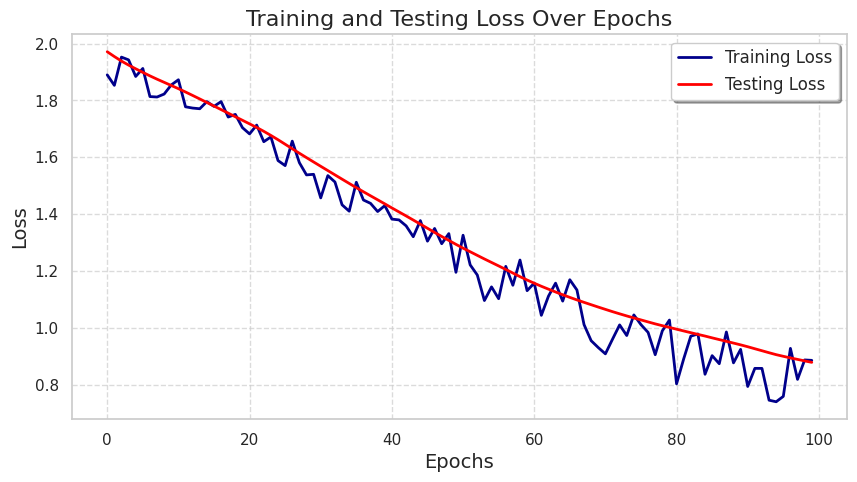

In [52]:
plt.figure(figsize=(10, 5))

# Plotting both training and testing/validation losses
plt.plot(train_losses, label='Training Loss', color='darkblue', linewidth=2)
plt.plot(test_losses, label='Testing Loss', color='red', linewidth=2)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training and Testing Loss Over Epochs', fontsize=16)
plt.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)
plt.show()


Defining a function to make predictions with the trained model on new inputs.

In [53]:
# Prediction Function
def predict(model, inputs):
    model.eval()
    with torch.no_grad():
        outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    return predicted

## Test Predictions

Generating predictions on the test set and adjusts the predicted class indices to match the original 1-7 range.

In [54]:
# Predicting on the test set
test_predictions = predict(model, X_test_tensor)
print(test_predictions)
test_predictions += 1

tensor([0, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 1, 1, 1, 0, 3, 3, 0, 3, 1, 0, 0])


## Conversion to DataFrame

in the last the predictions are converted back into a Pandas DataFrame for easier analysis and visualization.

In [55]:
# Converting predictions back to a pandas DataFrame
import pandas as pd
test_predictions_df = pd.DataFrame(test_predictions.numpy(), columns=['Predicted Class'])
test_predictions_df.head()

,Predicted Class
0,1
1,2
2,1
3,1
4,2


In [56]:
y_test_tensor

tensor([[1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0.]])

In [58]:
test_predictions = y_test_tensor.clone()

# Converting one-hot encoded labels to integer labels
true_labels = y_test_tensor.argmax(axis=1)
predicted_labels = test_predictions.argmax(axis=1)

# Generating the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Converting the confusion matrix to a DataFrame for better readability
confusion_matrix_df = pd.DataFrame(cm,
                                   index = [i for i in range(7)],
                                   columns = [i for i in range(7)])

confusion_matrix_df

,0,1,2,3,4,5,6
0,9,0,0,0,0,0,0
1,0,4,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,3,0,0,0
4,0,0,0,0,1,0,0
5,0,0,0,0,0,2,0
6,0,0,0,0,0,0,2


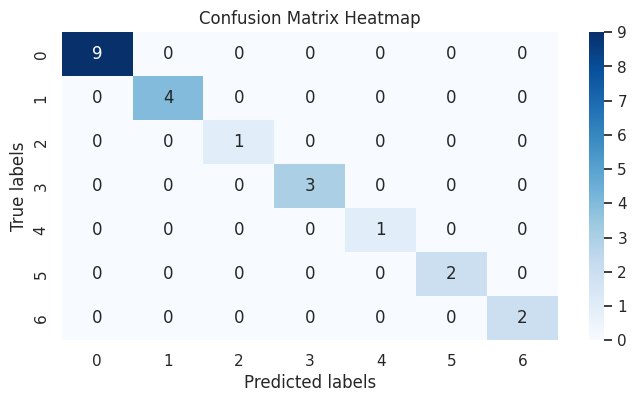

In [59]:
# Generating the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix_df, annot=True, fmt='g', cmap='Blues')

# Adding labels for clarity
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')

# Displaying the heatmap
plt.show()


In [60]:
from sklearn.metrics import accuracy_score

# Converting one-hot encoded labels to integer labels for true and predicted labels
true_labels = y_test_tensor.argmax(axis=1)
predicted_labels = test_predictions.argmax(axis=1)

# Generating the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Calculating accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Printing accuracy
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 1.00
